In [1]:
import pandas as pd
from scipy.stats import shapiro
from scipy.stats import ttest_ind, mannwhitneyu
import matplotlib.pyplot as plt

In [2]:
# Load data from CSV file
data = pd.read_csv('CompleteData.csv')


Real Estate Type: Condo Unit
Total Entries: 500
Total Highly Urbanized: 452
Total Less Urbanized: 48

Shapiro-Wilk Test for Highly Urbanized Cities:
Test Statistic: 0.9714791715888046
p-value: 1.0325861301679288e-07

Shapiro-Wilk Test for Less Urbanized Cities:
Test Statistic: 0.6944488666641682
p-value: 1.0606661084230693e-08


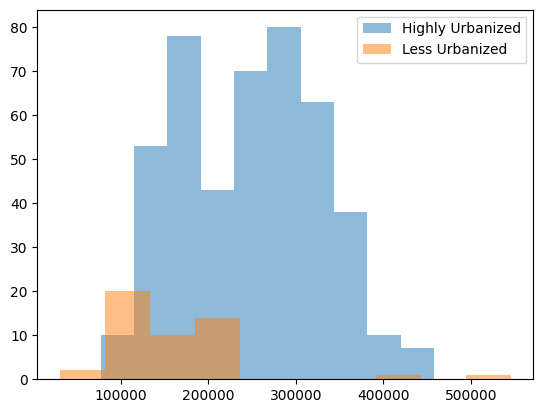


Independent Samples t-test:
t-statistic: 7.2255336687566984
p-value: 1.8854650616083486e-12

Mann-Whitney U Test:
U-statistic: 17859.5
p-value: 1.7498284245941374e-13

Real Estate Type: House
Total Entries: 386
Total Highly Urbanized: 62
Total Less Urbanized: 324

Shapiro-Wilk Test for Highly Urbanized Cities:
Test Statistic: 0.6772719053246474
p-value: 2.144570710353101e-10

Shapiro-Wilk Test for Less Urbanized Cities:
Test Statistic: 0.9253903571878976
p-value: 1.2131643974605588e-11


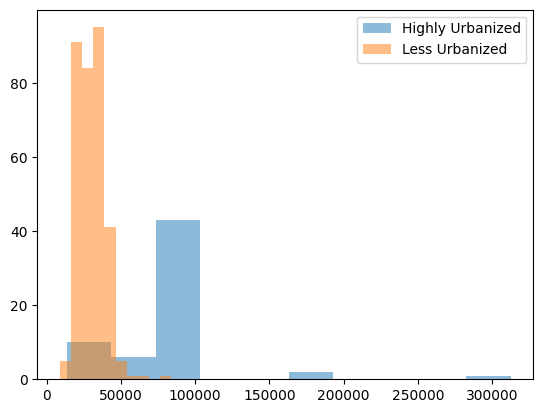


Independent Samples t-test:
t-statistic: 21.917253189857405
p-value: 1.2072638372226259e-69

Mann-Whitney U Test:
U-statistic: 19125.0
p-value: 1.536499044723749e-29

Real Estate Type: Lot
Total Entries: 310
Total Highly Urbanized: 12
Total Less Urbanized: 298

Shapiro-Wilk Test for Highly Urbanized Cities:
Test Statistic: 0.7032332987566257
p-value: 0.0009054234024560856

Shapiro-Wilk Test for Less Urbanized Cities:
Test Statistic: 0.8282558080139654
p-value: 1.680826299333494e-17


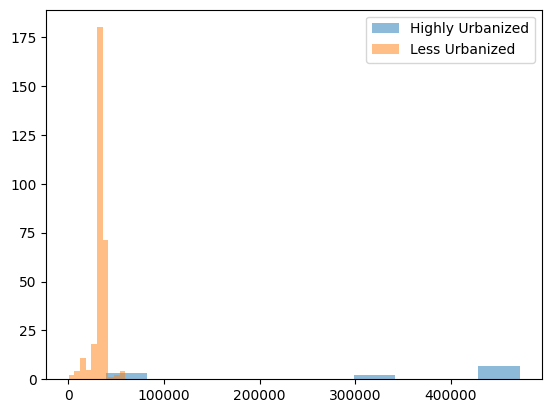


Independent Samples t-test:
t-statistic: 28.755350802078866
p-value: 3.166963642013431e-89

Mann-Whitney U Test:
U-statistic: 3538.0
p-value: 9.091633544362108e-09


In [7]:
# INDEPENDENT T-TEST AND MANN-WHITNEY U/Wilcoxon rank-sum test  STATISTICAL TEST

# Group data by real estate type
grouped_data = data.groupby('Real Estate Type')

# Perform statistical test for each type of real estate
for real_estate_type, group_data in grouped_data:
    print("\nReal Estate Type:", real_estate_type)
    print("Total Entries:", len(group_data))
    
    # Separate data into two groups based on the 'urbanized' column
    price_highly_urbanized = group_data[group_data['Highly Urbanized?'] == 1]['Price per sqm']
    price_less_urbanized = group_data[group_data['Highly Urbanized?'] == 0]['Price per sqm']
    print("Total Highly Urbanized:", len(price_highly_urbanized))
    print("Total Less Urbanized:", len(price_less_urbanized))

    # Shapiro-Wilk test for normality 
    # If p-value is greater than chosen significance level (e.g., 0.05), you can assume normality. If normal use t-test.
    stat_highly_urbanized, p_highly_urbanized = shapiro(price_highly_urbanized)
    stat_less_urbanized, p_less_urbanized = shapiro(price_less_urbanized)

    print("\nShapiro-Wilk Test for Highly Urbanized Cities:")
    print("Test Statistic:", stat_highly_urbanized)
    print("p-value:", p_highly_urbanized)

    print("\nShapiro-Wilk Test for Less Urbanized Cities:")
    print("Test Statistic:", stat_less_urbanized)
    print("p-value:", p_less_urbanized)

    # Visual inspection: Histograms (if bell curve looking then use t-test)
    plt.hist(price_highly_urbanized, bins=10, alpha=0.5, label='Highly Urbanized')
    plt.hist(price_less_urbanized, bins=10, alpha=0.5, label='Less Urbanized')
    plt.legend()
    plt.show()
    
    # Independent t-test
    # If less than significance value 0.05, reject null. Accept alternative.
    t_statistic, t_pvalue = ttest_ind(price_highly_urbanized, price_less_urbanized)
    print("\nIndependent Samples t-test:")
    print("t-statistic:", t_statistic)
    print("p-value:", t_pvalue)
    
    # Mann-Whitney U t-test
    # If less than significance value 0.05, reject null. Accept alternative.
    u_statistic, u_pvalue = mannwhitneyu(price_highly_urbanized, price_less_urbanized)
    print("\nMann-Whitney U Test:")
    print("U-statistic:", u_statistic)
    print("p-value:", u_pvalue)


Shapiro-Wilk Test for Highly Urbanized Cities:
Test Statistic: 0.9811150566026094
p-value: 2.50163861431833e-06

Shapiro-Wilk Test for Less Urbanized Cities:
Test Statistic: 0.40311938239438216
p-value: 3.672357084299595e-42


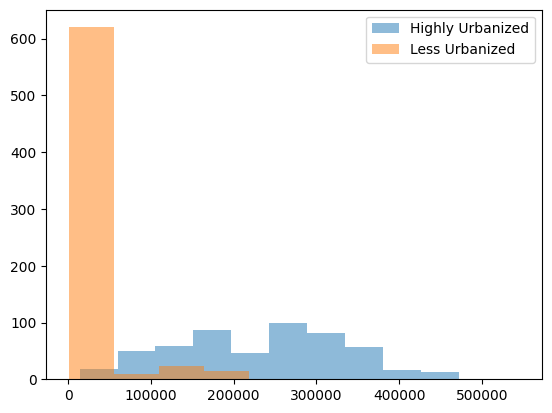


Independent Samples t-test:
t-statistic: 45.54212427408332
p-value: 2.5137489671614276e-263

Mann-Whitney U Test:
U-statistic: 343726.5
p-value: 1.280621993302539e-175


In [4]:
## Across all Real Estate Types

# Separate data into two groups based on the 'urbanized' column
price_highly_urbanized = data[data['Highly Urbanized?'] == 1]['Price per sqm']
price_less_urbanized = data[data['Highly Urbanized?'] == 0]['Price per sqm']

# Shapiro-Wilk test for normality 
# If p-value is greater than chosen significance level (e.g., 0.05), you can assume normality. If normal use t-test.
stat_highly_urbanized, p_highly_urbanized = shapiro(price_highly_urbanized)
stat_less_urbanized, p_less_urbanized = shapiro(price_less_urbanized)

print("\nFOR ACROSS ALL REAL ESTATE TYPES")

print("\nShapiro-Wilk Test for Highly Urbanized Cities:")
print("Test Statistic:", stat_highly_urbanized)
print("p-value:", p_highly_urbanized)

print("\nShapiro-Wilk Test for Less Urbanized Cities:")
print("Test Statistic:", stat_less_urbanized)
print("p-value:", p_less_urbanized)

# Visual inspection: Histograms (if bell curve looking then use t-test)
plt.hist(price_highly_urbanized, bins=10, alpha=0.5, label='Highly Urbanized')
plt.hist(price_less_urbanized, bins=10, alpha=0.5, label='Less Urbanized')
plt.legend()
plt.show()

# Independent t-test
# If less than significance value 0.05, reject null. Accept alternative.
t_statistic, t_pvalue = ttest_ind(price_highly_urbanized, price_less_urbanized)
print("\nIndependent Samples t-test:")
print("t-statistic:", t_statistic)
print("p-value:", t_pvalue)

# Mann-Whitney U t-test
# If less than significance value 0.05, reject null. Accept alternative.
u_statistic, u_pvalue = mannwhitneyu(price_highly_urbanized, price_less_urbanized)
print("\nMann-Whitney U Test:")
print("U-statistic:", u_statistic)
print("p-value:", u_pvalue)